In [1]:
using DataFrames, Gadfly

function response(t; ω=1,τ1=1,τ2=0.1,k=1,Δx=π/3,s1=sin(ω*t),s2=sin(ω*t-k*Δx) )
    D1 = exp(-t/τ1) |> x->x/sum(x)
    D2 = exp(-t/τ2) |> x->x/sum(x)
    r1 = conv(D1,s1)[1:length(t)]
    r2 = conv(D2,s2)[1:length(t)]
    r3 = conv(D2,s1)[1:length(t)]
    r4 = conv(D1,s2)[1:length(t)]

    R = r1.*r2 - r3.*r4
end

response (generic function with 1 method)

### $\phi$ illusion

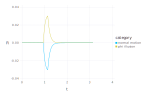

In [3]:
using Gadfly, DataFrames
t=0:0.01:π

S1(t) = t < 0.1 ? 1.0 : 0.0
S2(t) = (π/3-0.1 < t < π/3+0.1) ? -1.0 : 0.0

df = DataFrame(t=t,R=response(t; s1=S1.(t), s2=S2.(t)),category="normal motion")
df = vcat(df,DataFrame(t=t,R=response(t; s1=S1.(t), s2=-S2.(t)),category="phi illusion"))

plot(df, x=:t, y=:R, color=:category, Geom.line)

### $R(t)$

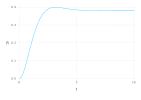

In [4]:
t=0:0.1:10
df = DataFrame(t=t,R=response(t))
plot(df, x=:t, y=:R, Geom.line)

### $R(\omega)$

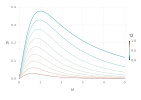

In [5]:
t = 0:0.1:100
ω = 0:0.1:5
Rmean(τ2) = [mean(response(t; ω=x,τ2=τ2)) for x in ω]

df = DataFrame()
for τ2 = 0.1:0.1:0.9
    df = vcat(df, DataFrame(ω = ω, R = Rmean(τ2), τ2 = τ2*ones(ω)))
end

plot(df, x=:ω, y=:R, color=:τ2, Geom.line)

### $\tau1-\tau2$

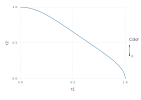

In [12]:
using Gadfly
df = DataFrame(τ1=0:0.01:1,τ2=0:0.01:1)
plot(df,x=:τ1,y=:τ2,z=(x,y)->(3x^2*y^2+x^2+y^2-1),Geom.contour(levels=[0]))